## Data Exploration

In [17]:
#Import 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [18]:
df= pd.read_csv('../../Data/training.csv')
print ('shape of df :' ,  df.shape)


shape of df : (95662, 16)


In [19]:
# Drop the columns that are not needed (CurrencyCode, CountryCode) same value for all rows
df.drop(['CurrencyCode', 'CountryCode'], axis=1, inplace=True)

# drop the column 'TransactionId' because it is not needed each transaction has a unique Id
df.drop(['TransactionId'], axis=1, inplace=True)
print (df.head())
print ('\n ---------------- \n Shape \n',df.shape)

          BatchId       AccountId       SubscriptionId       CustomerId  \
0   BatchId_36123  AccountId_3957   SubscriptionId_887  CustomerId_4406   
1   BatchId_15642  AccountId_4841  SubscriptionId_3829  CustomerId_4406   
2   BatchId_53941  AccountId_4229   SubscriptionId_222  CustomerId_4683   
3  BatchId_102363   AccountId_648  SubscriptionId_2185   CustomerId_988   
4   BatchId_38780  AccountId_4841  SubscriptionId_3829   CustomerId_988   

     ProviderId     ProductId     ProductCategory    ChannelId   Amount  \
0  ProviderId_6  ProductId_10             airtime  ChannelId_3   1000.0   
1  ProviderId_4   ProductId_6  financial_services  ChannelId_2    -20.0   
2  ProviderId_6   ProductId_1             airtime  ChannelId_3    500.0   
3  ProviderId_1  ProductId_21        utility_bill  ChannelId_3  20000.0   
4  ProviderId_4   ProductId_6  financial_services  ChannelId_2   -644.0   

   Value  TransactionStartTime  PricingStrategy  FraudResult  
0   1000  2018-11-15T02:18:49Z     

In [20]:
# Split the string in the column 'AccountId' to get the number of the account
df['AccountId'] = df['AccountId'].str.split('_').str[1] # split the string and get the 1th element
# Split the string in the column to get the transaction Id, same for the column 'BatchId', 'SubscriptionId', 'CustomerId', 'ProviderId', 'ProductId', 'ChannelId'
df['BatchId'] = df['BatchId'].str.split('_').str[1] # split the string and get the 1th element
df['SubscriptionId'] = df['SubscriptionId'].str.split('_').str[1] 
df['CustomerId'] = df['CustomerId'].str.split('_').str[1] 
df['ProviderId'] = df['ProviderId'].str.split('_').str[1] 
df['ProductId'] = df['ProductId'].str.split('_').str[1] 
df['ChannelId'] = df['ChannelId'].str.split('_').str[1] 

print (df.head())
print ('\n ---------------- \n Shape \n',df.shape)


print ('df["ProductCategory"].unique()', df["ProductCategory"].unique())

  BatchId AccountId SubscriptionId CustomerId ProviderId ProductId  \
0   36123      3957            887       4406          6        10   
1   15642      4841           3829       4406          4         6   
2   53941      4229            222       4683          6         1   
3  102363       648           2185        988          1        21   
4   38780      4841           3829        988          4         6   

      ProductCategory ChannelId   Amount  Value  TransactionStartTime  \
0             airtime         3   1000.0   1000  2018-11-15T02:18:49Z   
1  financial_services         2    -20.0     20  2018-11-15T02:19:08Z   
2             airtime         3    500.0    500  2018-11-15T02:44:21Z   
3        utility_bill         3  20000.0  21800  2018-11-15T03:32:55Z   
4  financial_services         2   -644.0    644  2018-11-15T03:34:21Z   

   PricingStrategy  FraudResult  
0                2            0  
1                2            0  
2                2            0  
3   

In [21]:
# Find the minimum and maximum date in the column 'TransactionStartTime'
print ('df["TransactionStartTime"].min()', df["TransactionStartTime"].min())
print ('df["TransactionStartTime"].max()', df["TransactionStartTime"].max())

df["TransactionStartTime"].min() 2018-11-15T02:18:49Z
df["TransactionStartTime"].max() 2019-02-13T10:01:28Z


In [22]:
# Normalize the column 'TransactionStartTime' to get the hour of the day
df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime']) # convert to datetime
df['TransactionStartTime'] = df['TransactionStartTime'].dt.hour # get the hour of the day
print (df.head())
print ('\n ---------------- \n Shape \n',df.shape)

  BatchId AccountId SubscriptionId CustomerId ProviderId ProductId  \
0   36123      3957            887       4406          6        10   
1   15642      4841           3829       4406          4         6   
2   53941      4229            222       4683          6         1   
3  102363       648           2185        988          1        21   
4   38780      4841           3829        988          4         6   

      ProductCategory ChannelId   Amount  Value  TransactionStartTime  \
0             airtime         3   1000.0   1000                     2   
1  financial_services         2    -20.0     20                     2   
2             airtime         3    500.0    500                     2   
3        utility_bill         3  20000.0  21800                     3   
4  financial_services         2   -644.0    644                     3   

   PricingStrategy  FraudResult  
0                2            0  
1                2            0  
2                2            0  
3   

In [23]:
# find the columns that have missing values
print ('df.isnull().sum()\n', df.isnull().sum())


df.isnull().sum()
 BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64


In [24]:
# register in a new df for an Ordinal Encoding 
df_ord = df.copy()

# Ordinal Encoding
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()


df_ord["ProductCategory"] = ord_enc.fit_transform(df_ord[["ProductCategory"]])


print (df_ord.head())
print ('\n ---------------- \n Shape \n',df_ord.shape)

  BatchId AccountId SubscriptionId CustomerId ProviderId ProductId  \
0   36123      3957            887       4406          6        10   
1   15642      4841           3829       4406          4         6   
2   53941      4229            222       4683          6         1   
3  102363       648           2185        988          1        21   
4   38780      4841           3829        988          4         6   

   ProductCategory ChannelId   Amount  Value  TransactionStartTime  \
0              0.0         3   1000.0   1000                     2   
1              2.0         2    -20.0     20                     2   
2              0.0         3    500.0    500                     2   
3              8.0         3  20000.0  21800                     3   
4              2.0         2   -644.0    644                     3   

   PricingStrategy  FraudResult  
0                2            0  
1                2            0  
2                2            0  
3                2    

In [25]:
# register in a new df for an One Hot Encoding
df_onehot = df.copy()

# One Hot Encoding
from sklearn.preprocessing import OneHotEncoder

onehot_enc = OneHotEncoder(sparse=False)

df_onehot["ProductCategory"] = onehot_enc.fit_transform(df_onehot[["ProductCategory"]])


print (df_onehot.head())

  BatchId AccountId SubscriptionId CustomerId ProviderId ProductId  \
0   36123      3957            887       4406          6        10   
1   15642      4841           3829       4406          4         6   
2   53941      4229            222       4683          6         1   
3  102363       648           2185        988          1        21   
4   38780      4841           3829        988          4         6   

   ProductCategory ChannelId   Amount  Value  TransactionStartTime  \
0              1.0         3   1000.0   1000                     2   
1              0.0         2    -20.0     20                     2   
2              1.0         3    500.0    500                     2   
3              0.0         3  20000.0  21800                     3   
4              0.0         2   -644.0    644                     3   

   PricingStrategy  FraudResult  
0                2            0  
1                2            0  
2                2            0  
3                2    

In [26]:
df_ord_diff_values_amount = df_ord.copy()

# Create a new column with the difference between the amount and the value
df_ord_diff_values_amount['(Amount-Value)'] = df_ord_diff_values_amount['Amount'] - df_ord_diff_values_amount['Value']
# Force object values to be numeric
df_ord_diff_values_amount = df_ord_diff_values_amount.apply(pd.to_numeric, errors='coerce') # coerce -> invalid parsing will be set as NaN


In [27]:
#print ("\n ---------------------  \n Before changing object to num", df_ord.info())
# Force object values to be numeric
df_ord = df_ord.apply(pd.to_numeric, errors='coerce') # coerce -> invalid parsing will be set as NaN

print ("\n ---------------------  \n After changing object to num", df_ord.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   BatchId               95662 non-null  int64  
 1   AccountId             95662 non-null  int64  
 2   SubscriptionId        95662 non-null  int64  
 3   CustomerId            95662 non-null  int64  
 4   ProviderId            95662 non-null  int64  
 5   ProductId             95662 non-null  int64  
 6   ProductCategory       95662 non-null  float64
 7   ChannelId             95662 non-null  int64  
 8   Amount                95662 non-null  float64
 9   Value                 95662 non-null  int64  
 10  TransactionStartTime  95662 non-null  int64  
 11  PricingStrategy       95662 non-null  int64  
 12  FraudResult           95662 non-null  int64  
dtypes: float64(2), int64(11)
memory usage: 9.5 MB

 ---------------------  
 After changing object to num None


## Identify the relevant features for supervised learning 
1) Pearson Correlation
2) Chi-Square Test
4) Fisher Score
5) Information Gain
6) Random Forest

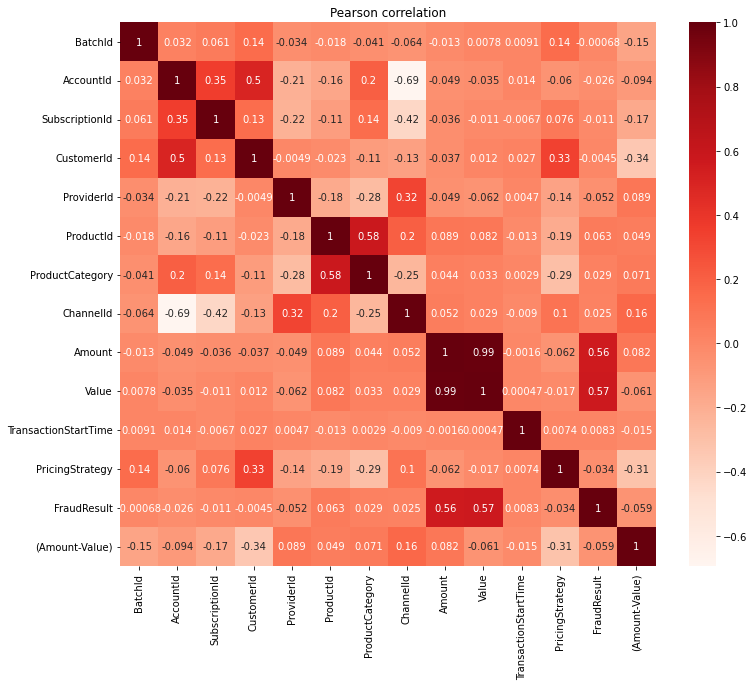

In [28]:
# Find the correlation between features and the target variable Class using Pearson correlation method
plt.figure(figsize=(12,10))
cor = df_ord_diff_values_amount.corr('pearson')
import seaborn as sns
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.title('Pearson correlation')
#plt.savefig('../Report/images/correlation_pearson.png')
plt.show()
# Save plots as png



# Find the correlation between features and the target variable Class using Spearman correlation method
# plt.figure(figsize=(12,10))
# cor = df_ord_diff_values_amount.corr(method='spearman')
# sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
# plt.title('Spearman correlation')
# plt.show()

# Save plots as png
#plt.savefig('../../Data/correlation-spearman.png')

In [29]:
# find the columns that have negative values
print ('df_ord_diff_values_amount negative values\n', df_ord_diff_values_amount[df_ord_diff_values_amount < 0].count())

df_ord_diff_values_amount negative values
 BatchId                     0
AccountId                   0
SubscriptionId              0
CustomerId                  0
ProviderId                  0
ProductId                   0
ProductCategory             0
ChannelId                   0
Amount                  38189
Value                       0
TransactionStartTime        0
PricingStrategy             0
FraudResult                 0
(Amount-Value)          40307
dtype: int64


SelectKBest(k=6, score_func=<function chi2 at 0x00000216BB2569D8>)
[[3.61230e+04 3.95700e+03 8.87000e+02 4.40600e+03 1.00000e+01 1.00000e+03]
 [1.56420e+04 4.84100e+03 3.82900e+03 4.40600e+03 6.00000e+00 2.00000e+01]
 [5.39410e+04 4.22900e+03 2.22000e+02 4.68300e+03 1.00000e+00 5.00000e+02]
 ...
 [1.18602e+05 4.84100e+03 3.82900e+03 3.87400e+03 6.00000e+00 2.00000e+01]
 [7.09240e+04 1.34600e+03 6.52000e+02 1.70900e+03 1.90000e+01 3.00000e+03]
 [2.93170e+04 4.84100e+03 3.82900e+03 1.70900e+03 6.00000e+00 6.00000e+01]]


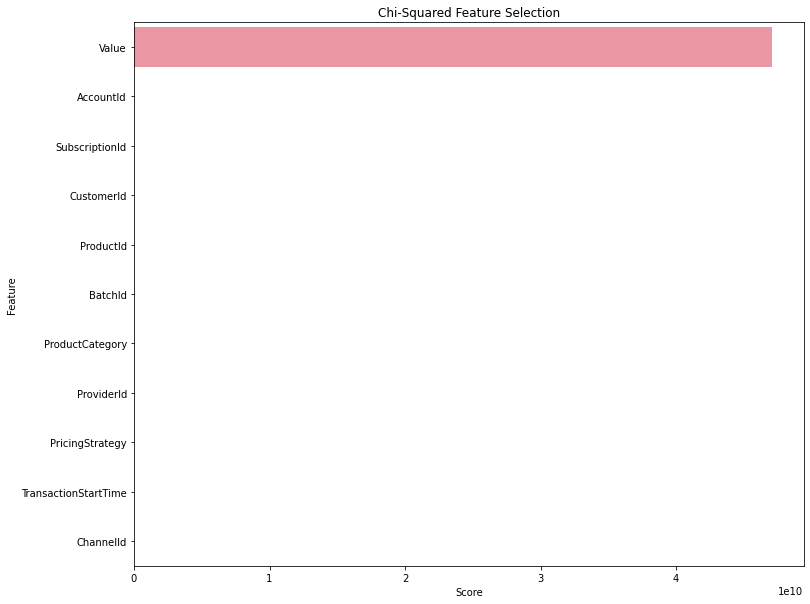

Original feature number: 14
Reduced feature number: 6


In [30]:
# Chi-Squared Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2




chi2_features = SelectKBest(chi2, k = 6) # select the 10 best features
print (chi2_features)
# Drop the column 'FraudResult' because it is the target variable drop Amount and (Amount-Value) because they are negative
X_kbest_features = chi2_features.fit_transform(df_ord_diff_values_amount.drop(['FraudResult', 'Amount', '(Amount-Value)'], axis=1).values, df_ord_diff_values_amount['FraudResult'].values)

print (X_kbest_features)

# plot the scores
plt.figure(figsize=(12,10))
scores = pd.DataFrame(chi2_features.scores_)
columns = pd.DataFrame(df_ord_diff_values_amount.drop(['FraudResult', 'Amount', '(Amount-Value)'], axis=1).columns)
scores.columns = ['Score']
columns.columns = ['Feature']
scores = pd.concat([columns, scores], axis=1)
scores = scores.sort_values(by='Score', ascending=False)
sns.barplot(x='Score', y='Feature', data=scores)
plt.title('Chi-Squared Feature Selection')
#plt.savefig('../Report/images/chi-squared-feature-selection.png')
plt.show()



# Get the selected features
print('Original feature number:', df_ord_diff_values_amount.shape[1])
print('Reduced feature number:', X_kbest_features.shape[1])



In [31]:
# # test de fisher


# score = fisher_score.fisher_score(df_ord_diff_values_amount.drop(['FraudResult'], axis=1).values, df_ord_diff_values_amount['FraudResult'].values)
# print (score)

# # plot the scores
# plt.bar([i for i in range(len(score))], score)
# plt.show()


[0.00034247 0.01055204 0.0098769  0.00700966 0.00983478 0.00625094
 0.00920068 0.0116138  0.01310967 0.01336126 0.00182259 0.01703221
 0.00207109]


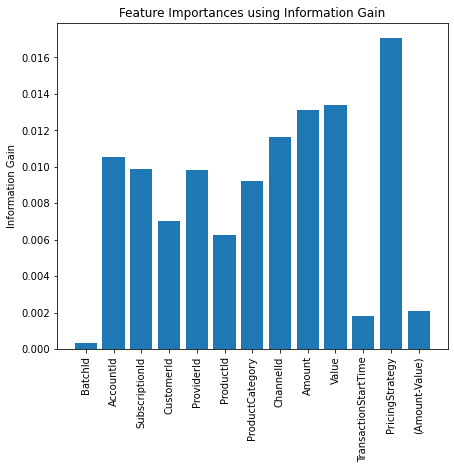

In [32]:
# information gain
from sklearn.feature_selection import mutual_info_classif

mutual_info = mutual_info_classif(df_ord_diff_values_amount.drop(['FraudResult'], axis=1).values, df_ord_diff_values_amount['FraudResult'].values)
print (mutual_info)
plt.figure(figsize=(7,6))
plt.title('Feature Importances using Information Gain')
plt.bar([i for i in range(len(mutual_info))], mutual_info)
plt.ylabel('Information Gain')
plt.xticks([i for i in range(len(mutual_info))], df_ord_diff_values_amount.drop(['FraudResult'], axis=1).columns, rotation='vertical')
#plt.savefig('../Report/images/feature_importance_information_gain.png')
plt.show()



[0.04410586 0.03704182 0.02827402 0.03860591 0.01356135 0.00544506
 0.0039022  0.00199146 0.40118053 0.37425899 0.02962011 0.01264014
 0.00937254]


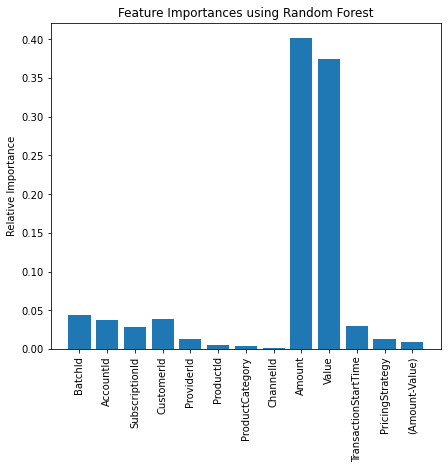

In [33]:
# Random Forest Feature Selection
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(df_ord_diff_values_amount.drop(['FraudResult'], axis=1), df_ord_diff_values_amount['FraudResult'])
print (rf.feature_importances_)
# plot the scores
plt.figure(figsize=(7,6))
plt.title('Feature Importances using Random Forest')
plt.bar([i for i in range(len(rf.feature_importances_))], rf.feature_importances_)
plt.ylabel('Relative Importance')
plt.xticks([i for i in range(len(rf.feature_importances_))], df_ord_diff_values_amount.drop(['FraudResult'], axis=1).columns, rotation='vertical')
#plt.savefig('../Report/images/feature_importance_rf.png')
plt.show()


[0.00033898 0.01093386 0.00951484 0.00675813 0.0097547  0.00678445
 0.00937771 0.01203864 0.01305054 0.01335358 0.00161098 0.01628951
 0.00212602]


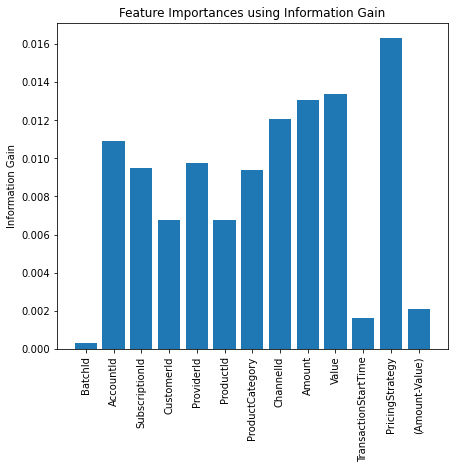

In [34]:
# mutual Information 
from sklearn.feature_selection import mutual_info_classif

mutual_info = mutual_info_classif(df_ord_diff_values_amount.drop(['FraudResult'], axis=1).values, df_ord_diff_values_amount['FraudResult'].values)
print (mutual_info)
plt.figure(figsize=(7,6))
plt.title('Feature Importances using Information Gain')
plt.bar([i for i in range(len(mutual_info))], mutual_info)
plt.ylabel('Information Gain')
plt.xticks([i for i in range(len(mutual_info))], df_ord_diff_values_amount.drop(['FraudResult'], axis=1).columns, rotation='vertical')
#plt.savefig('../Report/images/feature_importance_information_gain.png')
plt.show()



## Identify the best way to transform the  Numerical transactionStartTime feature into categorical feature

In [35]:
# drop each row where row fraud result is 0 

df_fraud_only = df_ord[df_ord['FraudResult'] != 0] 
print (df_fraud_only.head())


      BatchId  AccountId  SubscriptionId  CustomerId  ProviderId  ProductId  \
131     93685       3832            4161        4275           3         15   
146    125553       2366            4834        7414           5          9   
155     10381       3832            4161        4275           3         15   
2376    52644       3692            3451        4134           1         15   
2452    54481       3832            4161        4275           3         15   

      ProductCategory  ChannelId    Amount   Value  TransactionStartTime  \
131               2.0          3  700000.0  700000                     8   
146               2.0          1  725000.0  725000                     8   
155               2.0          3  700000.0  700000                     8   
2376              2.0          3  700000.0  700000                     9   
2452              2.0          3  700000.0  700000                    11   

      PricingStrategy  FraudResult  
131                 0          

In [36]:
# Drop every column except TransactionStartTime
df_fraud_only = df_fraud_only.drop([ 'ProductCategory','Amount','Value','BatchId', 'AccountId', 'SubscriptionId', 'CustomerId', 'ProviderId', 'ProductId', 'ChannelId', 'PricingStrategy', 'FraudResult'], axis=1)
print (df_fraud_only.head())




      TransactionStartTime
131                      8
146                      8
155                      8
2376                     9
2452                    11


In [37]:
# count the recurrence of each TransactionStartTime


print (df_fraud_only['TransactionStartTime'].value_counts()) # print the count of each TransactionStartTime value
print (df_fraud_only['TransactionStartTime'].value_counts().mean()) # print the mean of the count of each TransactionStartTime value
df_fraud_only_count = df_fraud_only['TransactionStartTime'].value_counts() # save the count of each TransactionStartTime value in a variable

12    24
16    18
13    17
21    15
18    13
17    12
9     10
11     9
7      9
20     9
8      8
14     8
15     8
3      7
6      7
5      6
22     4
10     4
19     4
0      1
Name: TransactionStartTime, dtype: int64
9.65


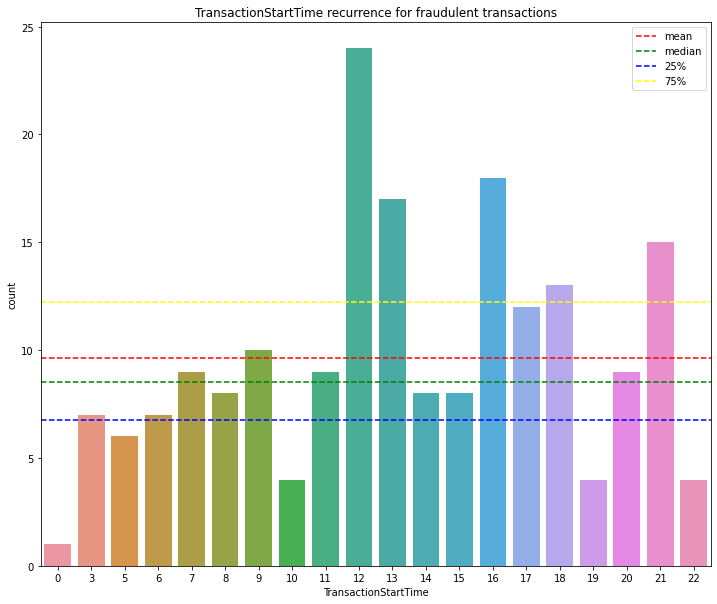

In [38]:
# plot bar the recurrence of each TransactionStartTime value

plt.figure(figsize=(12,10))
sns.countplot(x='TransactionStartTime', data=df_fraud_only)
#plot a line in the ghaph for the mean of the recurrence of each TransactionStartTime value
plt.axhline(df_fraud_only['TransactionStartTime'].value_counts().mean(), color='red', linestyle='--', label='mean')
## plot a line in the ghaph for the median of the recurrence of each TransactionStartTime value
plt.axhline(df_fraud_only['TransactionStartTime'].value_counts().median(), color='green', linestyle='--', label='median')
#plot a line in the ghaph for 25% of the recurrence of each TransactionStartTime value
plt.axhline(df_fraud_only['TransactionStartTime'].value_counts().quantile(0.25), color='blue', linestyle='--', label='25%')
#plot a line in the ghaph for 75% of the recurrence of each TransactionStartTime value show a description of the line in the legend
plt.axhline(df_fraud_only['TransactionStartTime'].value_counts().quantile(0.75), color='yellow', linestyle='--', label='75%')
plt.legend()



plt.title('TransactionStartTime recurrence for fraudulent transactions')
#plt.savefig('../Report/images/TransactionStartTime_recurrence_fraud.png')
plt.show()





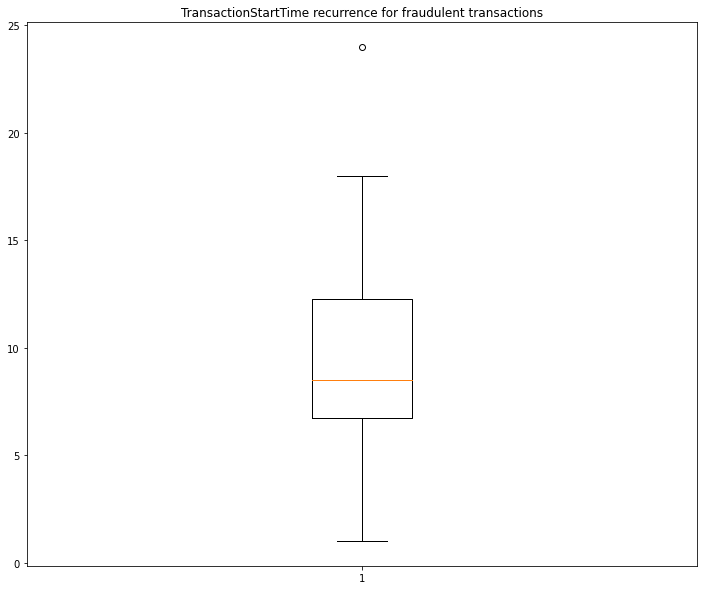

In [39]:
# plot df_fraud_only_count in a boxplot

plt.figure(figsize=(12,10))
plt.boxplot(df_fraud_only_count)
plt.title('TransactionStartTime recurrence for fraudulent transactions')
#plt.savefig('../Report/images/TransactionStartTime_recurrence_fraud_boxplot.png')
plt.show()

In [40]:
df_ord_time=df_ord.drop([ 'ProductCategory','Amount','Value','BatchId', 'AccountId', 'SubscriptionId', 'CustomerId', 'ProviderId', 'ProductId', 'ChannelId', 'PricingStrategy', 'FraudResult'], axis=1)

print (df_ord_time['TransactionStartTime'].value_counts()) # print the count of each TransactionStartTime value




16    7306
17    7291
18    6332
15    6285
11    6226
10    5986
7     5723
8     5639
9     5443
6     5325
12    5262
13    5224
14    5179
19    5132
5     4161
20    3026
4     2329
21    1479
3      714
22     683
2      289
23     284
1      176
0      168
Name: TransactionStartTime, dtype: int64


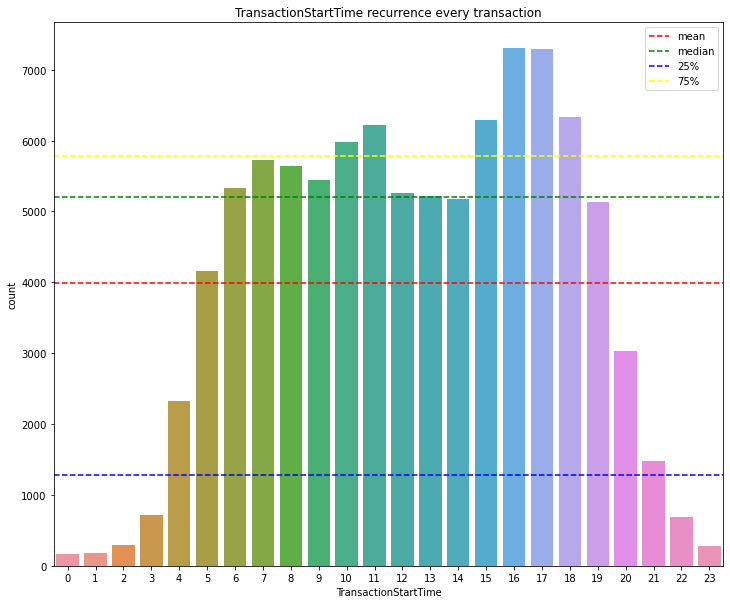

In [41]:
# Plot a graph with the count of each TransactionStartTime value for any transaction
plt.figure(figsize=(12,10))
sns.countplot(x='TransactionStartTime', data=df_ord_time)
#plot a line in the ghaph for the mean of the recurrence of each TransactionStartTime value
plt.axhline(df_ord_time['TransactionStartTime'].value_counts().mean(), color='red', linestyle='--', label='mean')
## plot a line in the ghaph for the median of the recurrence of each TransactionStartTime value
plt.axhline(df_ord_time['TransactionStartTime'].value_counts().median(), color='green', linestyle='--', label='median')
#plot a line in the ghaph for 25% of the recurrence of each TransactionStartTime value
plt.axhline(df_ord_time['TransactionStartTime'].value_counts().quantile(0.25), color='blue', linestyle='--', label='25%')
#plot a line in the ghaph for 75% of the recurrence of each TransactionStartTime value show a description of the line in the legend
plt.axhline(df_ord_time['TransactionStartTime'].value_counts().quantile(0.75), color='yellow', linestyle='--', label='75%')
plt.legend()



plt.title('TransactionStartTime recurrence every transaction')
#plt.savefig('../Report/images/TransactionStartTime_recurrence_every_transaction.png')
plt.show()

0     0.595238
1          NaN
2          NaN
3     0.980392
4          NaN
5     0.144196
6     0.131455
7     0.157260
8     0.141869
9     0.183722
10    0.066823
11    0.144555
12    0.456100
13    0.325421
14    0.154470
15    0.127287
16    0.246373
17    0.164586
18    0.205306
19    0.077942
20    0.297422
21    1.014199
22    0.585652
23         NaN
Name: TransactionStartTime, dtype: float64


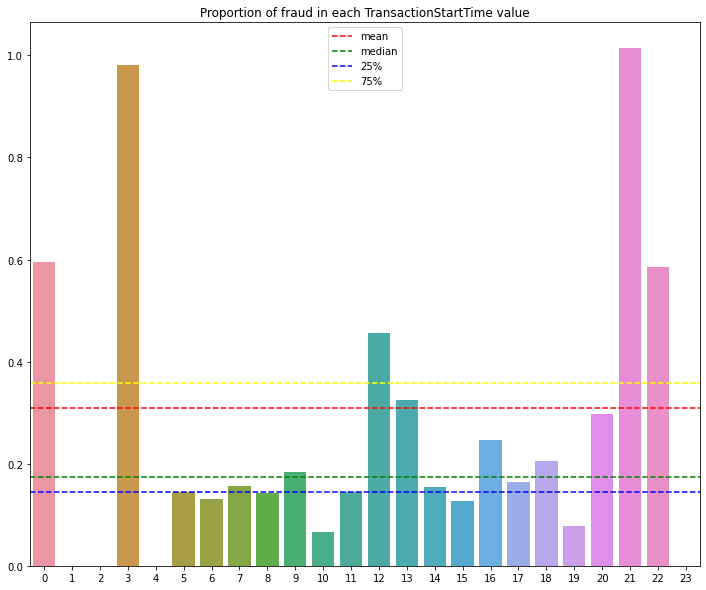

In [42]:
# Let's see the proportion of fraud in each TransactionStartTime value

proportion_of_fraudulent_transactions= (df_fraud_only['TransactionStartTime'].value_counts()/df_ord_time['TransactionStartTime'].value_counts())*100

print (proportion_of_fraudulent_transactions)

plt.figure(figsize=(12,10))
sns.barplot(x=proportion_of_fraudulent_transactions.index, y=proportion_of_fraudulent_transactions.values)
# plot a line in the ghaph for the mean of the proportion of fraud in each TransactionStartTime value
plt.axhline(proportion_of_fraudulent_transactions.mean(), color='red', linestyle='--', label='mean')
# plot a line in the ghaph for the median of the proportion of fraud in each TransactionStartTime value
plt.axhline(proportion_of_fraudulent_transactions.median(), color='green', linestyle='--', label='median')
# plot a line in the ghaph for 25% of the proportion of fraud in each TransactionStartTime value
plt.axhline(proportion_of_fraudulent_transactions.quantile(0.25), color='blue', linestyle='--', label='25%')
# plot a line in the ghaph for 75% of the proportion of fraud in each TransactionStartTime value show a description of the line in the legend
plt.axhline(proportion_of_fraudulent_transactions.quantile(0.75), color='yellow', linestyle='--', label='75%')
plt.legend()
plt.title('Proportion of fraud in each TransactionStartTime value')
#plt.savefig('../Report/images/TransactionStartTime_proportion_fraud.png')
plt.show()


## Feature creation and selection
Drop features with high correlation between them
Drop features with low correlation with the target variable
Create categorical features from numerical features such as transactionStartTime 
- 1: Morning (4:00 - 11:59)
- 2: Lunch (12:00 - 13:59)
- 3: Afternoon (14:00 - 19:59)
- 4: Night (20:00 - 3:49)

In [43]:
#Set value 1 for a transactionStartTime between 4 and 11
#Set value 2 for a transactionStartTime between 12 and 13
#Set value 3 for a transactionStartTime between 14 and 19
#Set value 4 for a transactionStartTime between 20 and 23
#Set value 4 for a transactionStartTime between 0 and 3

df_ord['TransactionStartTime'] = df_ord['TransactionStartTime'].apply(lambda x: 25 if x in range(0,4) else x)
df_ord['TransactionStartTime'] = df_ord['TransactionStartTime'].apply(lambda x: 1 if x in range(4,12) else x) # set value 1 for a transactionStartTime between 4 and 11
df_ord['TransactionStartTime'] = df_ord['TransactionStartTime'].apply(lambda x: 2 if x in range(14,20) else x)
df_ord['TransactionStartTime'] = df_ord['TransactionStartTime'].apply(lambda x: 3 if x in range(12,14) else x)
df_ord['TransactionStartTime'] = df_ord['TransactionStartTime'].apply(lambda x: 25 if x in range(20,24) else x)
df_ord['TransactionStartTime'] = df_ord['TransactionStartTime'].apply(lambda x: 4 if x == 25 else x)


print (df_ord['TransactionStartTime'].value_counts()) # print the count of each TransactionStartTime value

1    40832
2    37525
3    10486
4     6819
Name: TransactionStartTime, dtype: int64


In [44]:
print (df_ord['TransactionStartTime'].value_counts().sum()) # print the sum of the count of each TransactionStartTime value
print (df_ord['TransactionStartTime'])

95662
0        4
1        4
2        4
3        4
4        4
        ..
95657    1
95658    1
95659    1
95660    1
95661    1
Name: TransactionStartTime, Length: 95662, dtype: int64


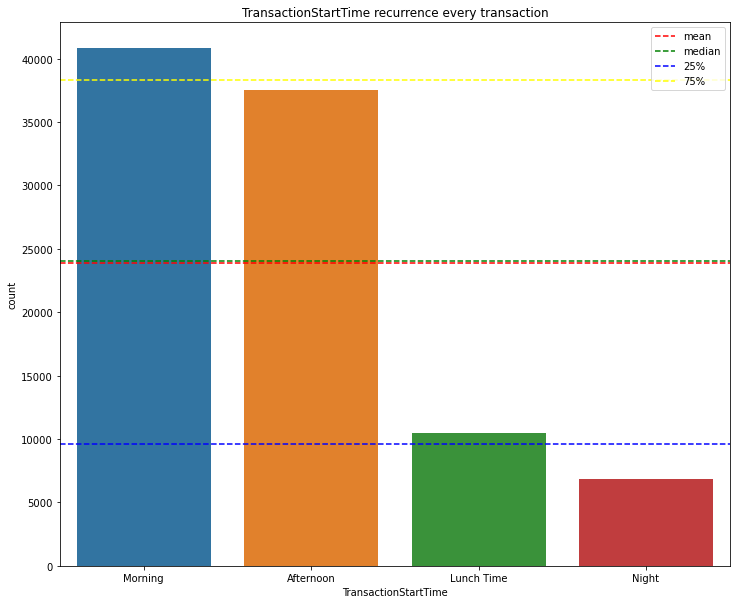

In [60]:
# Plot a graph with the count of each TransactionStartTime value for any transaction
plt.figure(figsize=(12,10))
sns.countplot(x='TransactionStartTime', data=df_ord)
#plot a line in the ghaph for the mean of the recurrence of each TransactionStartTime value
plt.axhline(df_ord['TransactionStartTime'].value_counts().mean(), color='red', linestyle='--', label='mean')
## plot a line in the ghaph for the median of the recurrence of each TransactionStartTime value
plt.axhline(df_ord['TransactionStartTime'].value_counts().median(), color='green', linestyle='--', label='median')
#plot a line in the ghaph for 25% of the recurrence of each TransactionStartTime value
plt.axhline(df_ord['TransactionStartTime'].value_counts().quantile(0.25), color='blue', linestyle='--', label='25%')
#plot a line in the ghaph for 75% of the recurrence of each TransactionStartTime value show a description of the line in the legend
plt.axhline(df_ord['TransactionStartTime'].value_counts().quantile(0.75), color='yellow', linestyle='--', label='75%')
plt.legend()

#Change the xticks labels if label ==1 then label = 'Morning' if label ==2 then label = 'Afternoon' if label ==3 then label = 'Lunch Time' if label ==4 then label = 'Night'
plt.xticks([0,1,2,3], ['Morning', 'Afternoon', 'Lunch Time', 'Night'])


plt.title('TransactionStartTime recurrence every transaction')
#plt.savefig('../Report/images/TransactionStartTime_recurrence_every_transaction_new_feature.png')
plt.show()

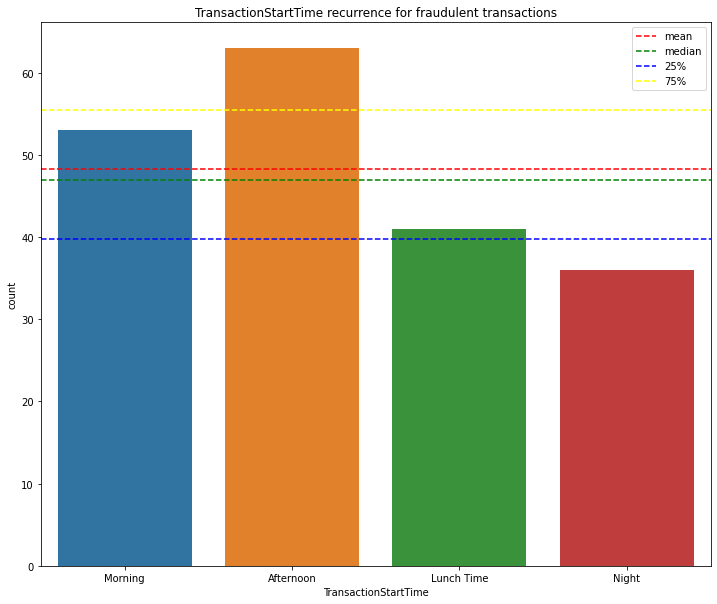

In [61]:
df_fraud_only = df_ord[df_ord['FraudResult'] != 0] 
# plot bar the recurrence of each TransactionStartTime value

plt.figure(figsize=(12,10))
sns.countplot(x='TransactionStartTime', data=df_fraud_only)
#plot a line in the ghaph for the mean of the recurrence of each TransactionStartTime value
plt.axhline(df_fraud_only['TransactionStartTime'].value_counts().mean(), color='red', linestyle='--', label='mean')
## plot a line in the ghaph for the median of the recurrence of each TransactionStartTime value
plt.axhline(df_fraud_only['TransactionStartTime'].value_counts().median(), color='green', linestyle='--', label='median')
#plot a line in the ghaph for 25% of the recurrence of each TransactionStartTime value
plt.axhline(df_fraud_only['TransactionStartTime'].value_counts().quantile(0.25), color='blue', linestyle='--', label='25%')
#plot a line in the ghaph for 75% of the recurrence of each TransactionStartTime value show a description of the line in the legend
plt.axhline(df_fraud_only['TransactionStartTime'].value_counts().quantile(0.75), color='yellow', linestyle='--', label='75%')
plt.legend()

#Change the xticks labels if label ==1 then label = 'Morning' if label ==2 then label = 'Afternoon' if label ==3 then label = 'Lunch Time' if label ==4 then label = 'Night'
plt.xticks([0,1,2,3], ['Morning', 'Afternoon', 'Lunch Time', 'Night'])



plt.title('TransactionStartTime recurrence for fraudulent transactions')
#plt.savefig('../Report/images/TransactionStartTime_recurrence_fraud_new_feature.png')
plt.show()

1    0.129800
2    0.167888
3    0.390998
4    0.527937
Name: TransactionStartTime, dtype: float64


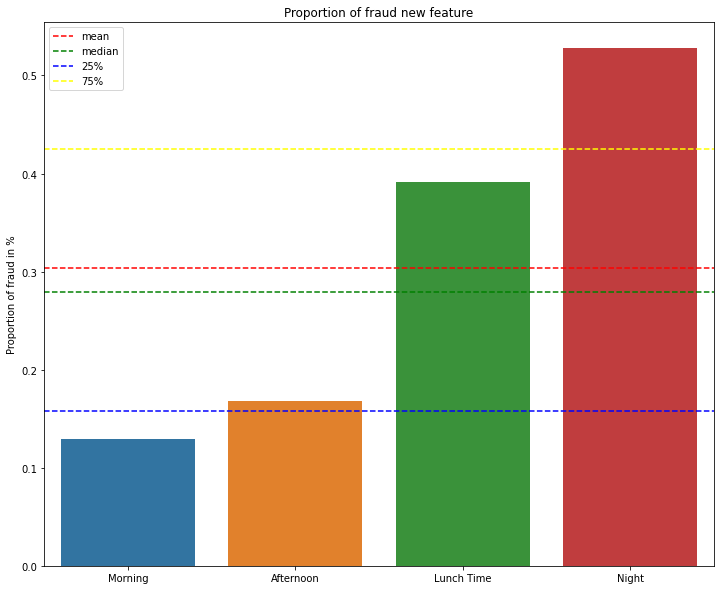

In [64]:
# Let's see the proportion of fraud in each TransactionStartTime value

proportion_of_fraudulent_transactions= (df_fraud_only['TransactionStartTime'].value_counts()/df_ord['TransactionStartTime'].value_counts())*100

print (proportion_of_fraudulent_transactions)

plt.figure(figsize=(12,10))
sns.barplot(x=proportion_of_fraudulent_transactions.index, y=proportion_of_fraudulent_transactions.values)
# plot a line in the ghaph for the mean of the proportion of fraud in each TransactionStartTime value
plt.axhline(proportion_of_fraudulent_transactions.mean(), color='red', linestyle='--', label='mean')
# plot a line in the ghaph for the median of the proportion of fraud in each TransactionStartTime value
plt.axhline(proportion_of_fraudulent_transactions.median(), color='green', linestyle='--', label='median')
# plot a line in the ghaph for 25% of the proportion of fraud in each TransactionStartTime value
plt.axhline(proportion_of_fraudulent_transactions.quantile(0.25), color='blue', linestyle='--', label='25%')
# plot a line in the ghaph for 75% of the proportion of fraud in each TransactionStartTime value show a description of the line in the legend
plt.axhline(proportion_of_fraudulent_transactions.quantile(0.75), color='yellow', linestyle='--', label='75%')
plt.legend()
#Change the xticks labels if label ==1 then label = 'Morning' if label ==2 then label = 'Afternoon' if label ==3 then label = 'Lunch Time' if label ==4 then label = 'Night'
plt.xticks([0,1,2,3], ['Morning', 'Afternoon', 'Lunch Time', 'Night'])
plt.title('Proportion of fraud new feature')
#plt y name 
plt.ylabel('Proportion of fraud in %')
#plt.savefig('../Report/images/TransactionStartTime_proportion_fraud_new_feature.png')
plt.show()

## validation of new features

[0.00033244 0.01098381 0.0095718  0.00694827 0.01002196 0.00654029
 0.00908792 0.01166114 0.01304479 0.01326538 0.00713634 0.01557827]


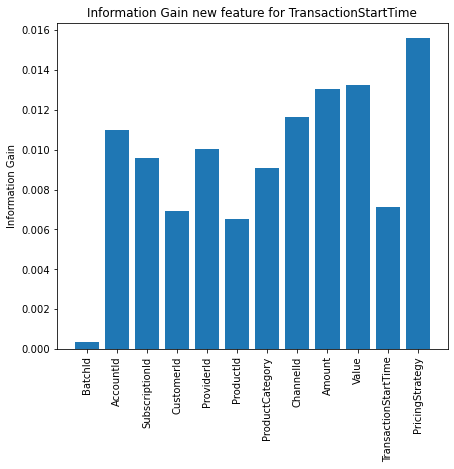

In [48]:
# information gain
from sklearn.feature_selection import mutual_info_classif

mutual_info = mutual_info_classif(df_ord.drop(['FraudResult'], axis=1).values, df_ord['FraudResult'].values)
print (mutual_info)
plt.figure(figsize=(7,6))
plt.title('Information Gain new feature for TransactionStartTime')
plt.bar([i for i in range(len(mutual_info))], mutual_info)
plt.ylabel('Information Gain')
plt.xticks([i for i in range(len(mutual_info))], df_ord.drop(['FraudResult'], axis=1).columns, rotation='vertical')
plt.savefig('../Report/images/information_gain_new_start_time.png')
plt.show()

[0.05165902 0.0415626  0.02815549 0.03606902 0.01094571 0.00432574
 0.00320345 0.00128566 0.40715221 0.39098425 0.01415229 0.01050457]


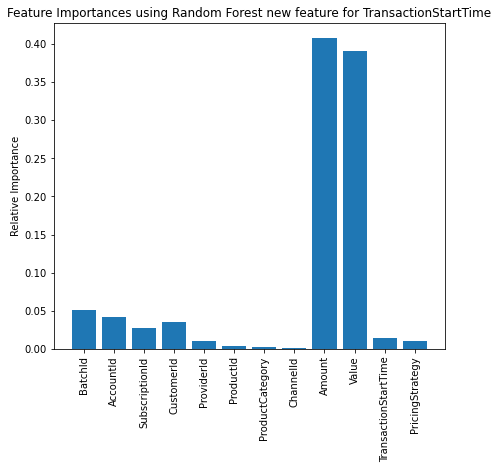

In [49]:
# Random Forest Feature Selection
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(df_ord.drop(['FraudResult'], axis=1), df_ord['FraudResult'])
print (rf.feature_importances_)
# plot the scores
plt.figure(figsize=(7,6))
plt.title('Feature Importances using Random Forest new feature for TransactionStartTime')
plt.bar([i for i in range(len(rf.feature_importances_))], rf.feature_importances_)
plt.ylabel('Relative Importance')
plt.xticks([i for i in range(len(rf.feature_importances_))], df_ord.drop(['FraudResult'], axis=1).columns, rotation='vertical')
plt.savefig('../Report/images/feature_importance_rf__new_start_time.png')
plt.show()


### Cleaning Data

In [50]:
# Drop BatchId, CostumerId,Ammount,ProductId
df_ord = df_ord.drop(['BatchId', 'CustomerId','Amount','ProductId'], axis=1)
print (df_ord.head())

   AccountId  SubscriptionId  ProviderId  ProductCategory  ChannelId  Value  \
0       3957             887           6              0.0          3   1000   
1       4841            3829           4              2.0          2     20   
2       4229             222           6              0.0          3    500   
3        648            2185           1              8.0          3  21800   
4       4841            3829           4              2.0          2    644   

   TransactionStartTime  PricingStrategy  FraudResult  
0                     4                2            0  
1                     4                2            0  
2                     4                2            0  
3                     4                2            0  
4                     4                2            0  


[0.01099615 0.00954496 0.00959376 0.00845775 0.01196279 0.01320209
 0.00695396 0.01651579]


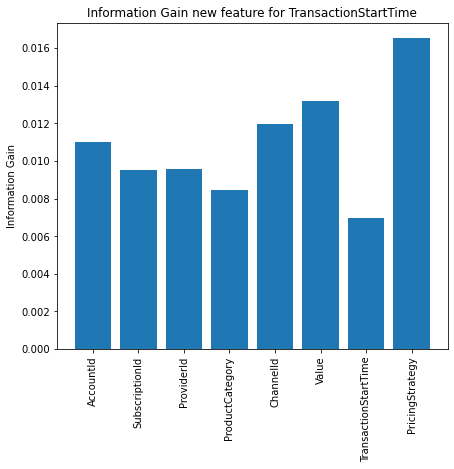

In [51]:
# information gain
from sklearn.feature_selection import mutual_info_classif

mutual_info = mutual_info_classif(df_ord.drop(['FraudResult'], axis=1).values, df_ord['FraudResult'].values)
print (mutual_info)
plt.figure(figsize=(7,6))
plt.title('Information Gain new feature for TransactionStartTime')
plt.bar([i for i in range(len(mutual_info))], mutual_info)
plt.ylabel('Information Gain')
plt.xticks([i for i in range(len(mutual_info))], df_ord.drop(['FraudResult'], axis=1).columns, rotation='vertical')
#plt.savefig('../Report/images/feature_importance_information_gain.png')
plt.show()

[0.0786714  0.07478772 0.02285353 0.01221665 0.00201963 0.7646146
 0.02692282 0.01791365]


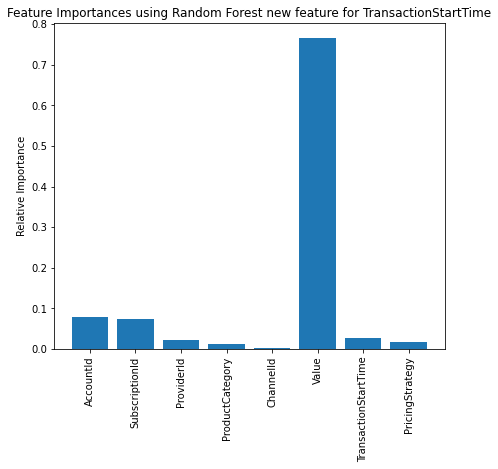

In [52]:
# Random Forest Feature Selection
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(df_ord.drop(['FraudResult'], axis=1), df_ord['FraudResult'])
print (rf.feature_importances_)
# plot the scores
plt.figure(figsize=(7,6))
plt.title('Feature Importances using Random Forest new feature for TransactionStartTime')
plt.bar([i for i in range(len(rf.feature_importances_))], rf.feature_importances_)
plt.ylabel('Relative Importance')
plt.xticks([i for i in range(len(rf.feature_importances_))], df_ord.drop(['FraudResult'], axis=1).columns, rotation='vertical')
#plt.savefig('../Report/images/feature_importance_rf.png')
plt.show()

### Save the cleaned data to a new csv file for supervised learning

In [53]:
# Save df_ord in a csv file
df_ord.to_csv('../../Data/cleaned_data.csv', index=False)


# Continue the analysis with MCA Multiple correspondance analysis


ZeroDivisionError: float division by zero

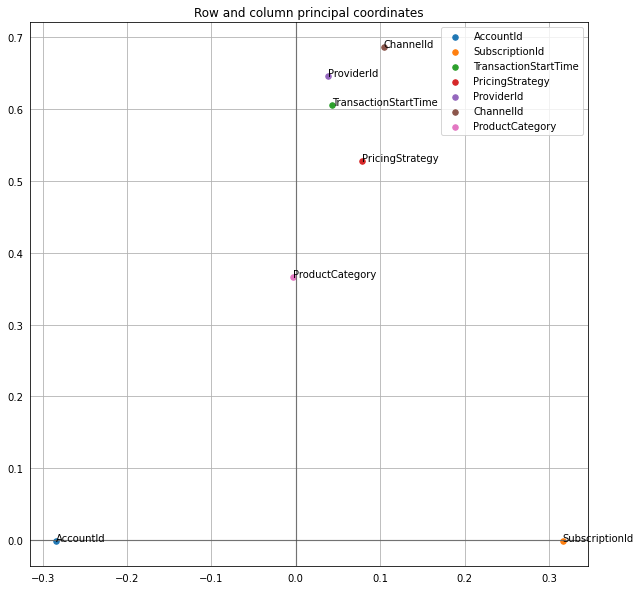

In [54]:
# MCA analysis
# import prince


import prince

df= df_ord[['AccountId','SubscriptionId','TransactionStartTime','PricingStrategy','ProviderId','ChannelId','ProductCategory']]#, 'FraudResult']]
mca = prince.MCA()
mca = mca.fit(df)

mca.plot_coordinates( df , figsize=(10, 10), show_row_points= False, show_column_points=True , show_column_labels=True)
#plt.savefig('../Report/images/mca.png')
#plt.show()